In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_train_seg = (x_train.mean(axis=-1) > 0.5).astype(int)
y_test_seg = (x_test.mean(axis=-1) > 0.5).astype(int)

In [5]:
#y_train_seg.shape = (num_samples, height, width, 1)
y_train_seg = y_train_seg[:, :, :, np.newaxis]
y_test_seg = y_test_seg[:, :, :, np.newaxis]

In [6]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D,concatenate

In [7]:
def unet_model(input_size=(32, 32, 3)):
    inputs = Input(input_size)
# Downsampling
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
# Bottleneck
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
# Upsampling
    u1 = UpSampling2D((2, 2))(c3)
    m1 = concatenate([u1, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(m1)
    u2 = UpSampling2D((2, 2))(c4)
    m2 = concatenate([u2, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(m2)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    return Model(inputs, outputs)

In [8]:
# Compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

In [9]:
# Train the model
model.fit(x_train, y_train_seg, validation_data=(x_test, y_test_seg),
epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 98ms/step - accuracy: 0.9379 - loss: 0.1386 - val_accuracy: 0.9873 - val_loss: 0.0325
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.9889 - loss: 0.0286 - val_accuracy: 0.9934 - val_loss: 0.0192
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.9926 - loss: 0.0195 - val_accuracy: 0.9910 - val_loss: 0.0196
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.9945 - loss: 0.0147 - val_accuracy: 0.9921 - val_loss: 0.0164
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.9953 - loss: 0.0122 - val_accuracy: 0.9973 - val_loss: 0.0092
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 96ms/step - accuracy: 0.9963 - loss: 0.0101 - val_accuracy: 0.9976 - val_loss: 0.0080
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 0.9966 - loss: 0.0091 - val_accuracy: 0.9973 - val_loss: 0.0075
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


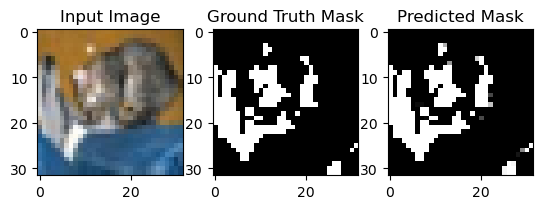

In [18]:
import matplotlib.pyplot as plt
i=0
pred = model.predict(x_test[[i]])
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(x_test[i])
plt.subplot(1, 3, 2)
plt.title("Ground Truth Mask")
plt.imshow(y_test_seg[i].squeeze(), cmap='gray')
plt.subplot(1, 3, 3)    
plt.title("Predicted Mask")
plt.imshow(pred[0].squeeze(), cmap='gray')
plt.show()